In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load 2PCF

In [72]:
xi_file=np.load('/mnt/store1/oliverphilcox/linear_kaiser_xi.npz')

In [73]:
r_all = xi_file.f.r
r2xi0=xi_file.f.r2xi0
r2xi2=xi_file.f.r2xi2
r2xi4=xi_file.f.r2xi4

xi_out = np.divide(np.vstack([r2xi0,r2xi2,r2xi4]).T,r_all.reshape(-1,1)**2)
ells = [0,2,4]

mus = np.linspace(0.,1.,120)

from scipy.special import legendre

xi_out_mu = np.zeros([len(xi_out),len(mus)])
for l_i,ell in enumerate(ells):
    xi_out_mu+=np.matmul(xi_out[:,l_i].reshape(-1,1),legendre(ell)(mus).reshape(1,-1))

In [91]:
outfile = '/home/oliverphilcox/COMAJE/xi_tmp'#/mnt/store1/oliverphilcox/QPM_xi/linear_kaiser_xi.xi'

with open(outfile,"w") as out:
    for r_i,r in enumerate(r_all):
        out.write("%.6e"%r)
        if r_i<len(r_all)-1:
            out.write("\t")
        else:
            out.write("\n")
    for mu_i,mu in enumerate(mus):
        out.write("%.6e"%mu)
        if mu_i<len(mus)-1:
            out.write("\t")
        else:
            out.write("\n")
    for i in range(len(xi_out_mu)):
        for j in range(len(xi_out_mu[0])):
            out.write("%.6e"%xi_out_mu[i,j])
            if j<len(mus)-1:
                out.write("\t")
            else:
                out.write("\n")

In [89]:
xi_out.shape

(2000, 3)

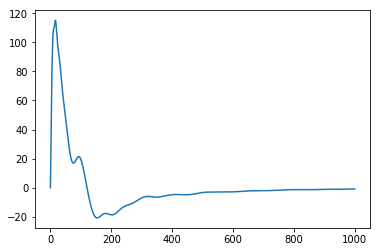

In [76]:
plt.plot(r_all,r2xi0)